## Intro

This is our final lecture!! Crazy I know. Today's class:
1. has the main goal of creating 3 visualizations and writing a story;
2. is built on what we have done during the last two weeks. Thus, it is really important that you finish up the work from previous weeks.

Until now we have mainly focused on exploratory data analysis and visualization. In the last couple of weeks we have also built a classification method and debiased it after having discovered that its predictions were not fair. This work was loosly reproducing previous work from [ProPublica](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing). 

Today, we are going to put everything together to create a story about this case with our own analysis: 

1. First, we will get an introduction on explanatory visualizations and narratives;
2. Second, we will transform this notebook into an article, using both visualizations and descriptions to communicate your results to others.

## Part 1. Explanatory and narrative data visualization

We start with a video from Sune and then answer a few questions to make sure you've read the scientific article about types of explanatory dataviz. (*The video is from an old version of the class that used D3, so just ignore those parts. Sune will make a new one ASAP*).

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/yHKYMGwefso/0.jpg)](https://www.youtube.com/watch?v=yHKYMGwefso)

> *Exercises 1.1*: Explanatory data visualization.
> * What are the three key elements to keep in mind when you design an explanatory visualization? List and explain them.

    Know your audience
    Ask youself what do you want to communicate
    Allow exploration of the data

> * Explain in your own words: How is explanatory data analysis different from exploratory data analysis?

    Exploratary is objective where explanatory is more subjective.
    Explanatory is for other people where explanatory is for your own usage

> *Exercise 1.2*: Answer a couple of questions from E. Segel and J. Heer paper [Narrative Visualization: Telling Stories with Data](http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf).
> 
> * What is the *Oxford English Dictionary's* defintion of a narrative?

> * What is your favorite visualization among the examples in section 3? Explain why in a few words.

> * Use Figure 7 to find the most common design choice within each category for the Visual narrative and Narrative structure (the categories within visual narrative are 'visual structuring', 'highlighting', etc).

> * Check out Figure 8 and section 4.3. What is your favorite genre of narrative visualization? Why? What is your least favorite genre? Why?


## Part 2. Communicate your story and results to others

#### Introduction

You have been hired by ProPublica as a freelencer to follow a case related to COMPAS (Correctional Offender Management Profiling for Alternative Sanctions), a popular commercial algorithm used by judges and parole officers for scoring criminal defendant’s likelihood of reoffending (recidivism).

You have collected the data and did some exploratory data analysis together with some modeling to understand what was going on. You have found that not only the data is biased, but also that this bias affects the performance of your classification algorithm. You know that this is a main issue and want to write an article that ProPublica will publish to inform the general public. In the article, you will explain the data bias, the algorithm prediction bias, and, because you are super thorough, you will also show how to debias the predictions of the algorithm.

---

#### Instruction to complete the article

These are the instructions to move forward:

1. First, to build a story I like to start by thinking about the key content: visualizations. What you are going to visualize will shape your story. I gave you instructions on how to build the visualizations below. We will make three visualizations: 
   * An interactive visualization to show the **bias in the data**
   * A visualization to show the **biased predictions** of your model
   * A visualization to show the **debiased results**
2. Second, we are going to convert the Notebook into an article. I drafted the structure of the article below, which you will replace with your content. These are the main parts: 
    * **A title** and **subtitles** (i.e. replace **Introduction**, **Results from exploratory data analysis**, etc. with a subtitle).
    * **An introduction**. 
    * **A description of** your findings from the **data exploration** step. 
    * **A description of** your findings from the **model predictions**.
    * **A description of** your results on **the debiasing step**.
    * **Limitations and Conclusion**.
    * **References.**

---

#### Instructions to create the visualizations

Here, you have the instructions to build your visualizations. Once you have them ready, move them to the article draft below!

**Note** Some of you where confused by the code in markdown, and Bokeh in general. Thus, I've created an [extra notebook](https://github.com/suneman/socialdata2022/blob/main/lectures/W7-8_ExtraBokeh.ipynb) with the structure of the code that create the step 1 step 2 and compute the fractions of step 3 of *Visualization 1* below. You need to fill in the code, but hopefully it will be clearer than its markdown version from Week 7. Also, you can reuse the code to complete Week 7 Ex. 1.1.

> *Visualization 1.* Exploratory data analysis. The interactive visualization we are going to make uses the same code you put together for Week 7 Exercise 1.1 (where we made bar plot of the number of recommited crimes across ages divided by race), with a few changes/adds on:
>
>    * First, instead of age, create an `age_group` column to use on the x-axis. The groups should be $(0,20],(20,40],(40,60],(60,80],(80,100]$. 
>    * Second, instead of using the number of recommitted crimes for each race, compute the total number of samples per age group and the total number of recommitted crimes per age group. 
>    * Third, we are going to add a `HoverTool` as in Week 7, Exercise 1.2 showing two fractions:
>        * the number of recommitted crimes of the age group over the number of samples of the age group;
>        * the number of recommitted crimes of the age group over the total recommitted crimes across age groups.
>    * The result should look similar to [this](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/W8_Viz1_sub.png).
>    * Now that you have the code for this plot, create other two plots in the same way but by using `sex` and `race`.
>    * Finally, combine the three plots into one unique visualization with `Tabs` and `Panel`. To have an hint on how to do it, have a look at [this solution](https://stackoverflow.com/questions/38169164/adding-layout-to-tabs-on-bokeh-dashboard)
>    * You just created your first visualization for the article! You can personalize it as you like, but it should look somewhat like the one in the following video: 

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/eJZGQiA7CKo/0.jpg)](https://www.youtube.com/watch?v=eJZGQiA7CKo)

In [9]:
import pandas as pd
#Columns to be kept for the test set
column_list = ["age", "sex", "race", "juv_fel_count", "juv_misd_count", "juv_other_count",
               "priors_count", "two_year_recid", "days_b_screening_arrest","is_recid","c_charge_degree"]

df = pd.read_csv("DataAssignment2.txt")

### preprocess data
data = (
    df
    [column_list]
    .drop(df[df.is_recid==-1].index,axis=0)
    .drop(df[df.c_charge_degree=="O"].index,axis=0)
    .drop(df[df.days_b_screening_arrest< -30].index, axis = 0 )
    .drop(df[df.days_b_screening_arrest > 30].index, axis = 0) # only records with in between -30 and 30 days between arrest and screening
    .join(pd.get_dummies(df.race)) ### one-hot enc. of race
    .join(pd.get_dummies(df.sex)) ### one-hot enc. of sex
    .drop(['days_b_screening_arrest', 'sex','c_charge_degree','is_recid',], axis = 1) # drop unnessecary features
)
### define target
target = data['two_year_recid']








In [10]:
from collections import Counter
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import Magma256
from bokeh.models import HoverTool

# Generating the plots for age
df_age=data.groupby(["age"])
df_age=df_age.sum().reset_index()
bins= [0,21,41,61,81,101]
labels = ['0-20','20-40','40-60','60-80','80-100']
df_age['AgeGroup'] = pd.cut(df_age['age'], bins=bins, labels=labels, right=False)
cases=df_age.groupby('AgeGroup').sum()[['Other', 'African-American', 'Caucasian', 'Hispanic', 'Asian', 'Native American']].sum(axis=1).reset_index()
final=df_age.groupby("AgeGroup").sum().reset_index()
df_final=pd.merge(cases,final).rename(columns={0: "Tot_cases"}).drop(columns="age")
df_final=df_final.drop(columns={"African-American","Asian","Caucasian","Hispanic","Native American","Other"})
df_final["p_group"]=df_final["two_year_recid"]/df_final["Tot_cases"]
df_final["p_tot"]=df_final["two_year_recid"]/df_final["two_year_recid"].sum()

#Generating the plots for sex
sex_tot_crimes_male=data[data.Male==1]["age"].count()
sex_tot_crimes_female=data[data.Female==1]["age"].count()
sex_recomitted_male=data.loc[ (data["Male"]==1) & (data["two_year_recid"]==1) ]["age"].count()
sex_recomitted_female=data.loc[ (data["Female"]==1) & (data["two_year_recid"]==1) ]["age"].count()
df_sex=pd.DataFrame({'Sex': ['Male','Female'], 'Crimes': [sex_tot_crimes_male,sex_tot_crimes_female],'Recomitted_crimes':[sex_recomitted_male,sex_recomitted_female]} ) 
df_sex["p_gender"]=df_sex["Recomitted_crimes"]/df_sex["Crimes"]
df_sex["p_tot"]=df_sex["Recomitted_crimes"]/df_sex["Recomitted_crimes"].sum()

# Generating the plots data for race
df_race_tot_crimes=data.groupby('race')["age"].count().reset_index().rename(columns={"age":"Tot_cases"})
df_race_recomitted=data.groupby('race')["two_year_recid"].sum().reset_index()
df_race=pd.merge(df_race_tot_crimes,df_race_recomitted)
df_race["p_race"]=df_race["two_year_recid"]/df_race["Tot_cases"]
df_race["p_tot"]=df_race["two_year_recid"]/df_race["two_year_recid"].sum()


In [12]:
#### PLOTS ####
from bokeh.layouts import layout
from bokeh.models.widgets import Tabs, Panel
from bokeh.io import curdoc
# #Age plot
cds = ColumnDataSource(df_final)
hover_tools=HoverTool(tooltips=[
    ('Fraction of recomitted crimes in age category','@p_group'),('Fraction of recomitted crimes across age groups','@p_tot')
])


p=figure(title="Crimes pr agegroup",x_axis_label='Age',y_axis_label='N. samples',tools=[hover_tools])
bar={}
labels1=["Tot_cases","two_year_recid"]

for indx,i in enumerate(labels1):
         bar[indx] = p.vbar(x='index',  top=i, source= cds, legend_label=i,width=0.6,color=Magma256[indx*75+50]) 
p.xaxis.ticker = list(range(len(labels)))
p.legend.click_policy="hide"
p.xaxis.major_label_overrides=dict(zip(range(len(labels)), labels))


#Gender plot
cds_sex=ColumnDataSource(df_sex)
bar={}
hover_tools=HoverTool(tooltips=[
    ('Fraction of recomitted crimes pr gender','@p_gender'),('Fraction of recomitted crimes across genders','@p_tot')
])
p1=figure(title="Commited crimes pr gender",x_axis_label='Gender ',y_axis_label='N. samples',tools=[hover_tools])

labels2=["Crimes","Recomitted_crimes"]

for indx,i in enumerate(labels2):
         bar[indx] = p1.vbar(x='index',  top=i, source= cds_sex, legend_label=i,width=0.6,color=Magma256[indx*75+50]) 
p1.legend.click_policy="hide"
p1.xaxis.ticker = [0,1]
p1.xaxis.major_label_overrides=dict(zip([0,1], ['Male','Female']))


#Race plot
cds_race=ColumnDataSource(df_race)
bar={}
hover_tools=HoverTool(tooltips=[
    ('Fraction of recomitted crimes pr race','@p_race'),('Fraction of recomitted crimes across races','@p_tot')
])
p2=figure(title="Commited crimes pr race",x_axis_label='Race',y_axis_label='N. samples',tools=[hover_tools])

for indx,i in enumerate(labels1):
         bar[index] = p2.vbar(x='index',  top=i, source= cds_race, legend_label=i,width=0.6,color=Magma256[indx*75+50]) 
p2.legend.click_policy="hide"
p2.xaxis.ticker = list(range(len(df_race["race"])))
p2.xaxis.major_label_overrides=dict(zip(range(len(df_race["race"])), df_race["race"]))

l1 = layout([[p]])
l2 = layout([[p1]])
l3 = layout([[p2]])

tab1 = Panel(child=l1,title="Age groups")
tab2 = Panel(child=l2,title="Gender")
tab3 = Panel(child=l3,title="Race")
tabs = Tabs(tabs=[ tab1, tab2, tab3 ])
show(tabs)


AttributeError: unexpected attribute 'legend_label' to VBar, possible attributes are bottom, fill_alpha, fill_color, hatch_alpha, hatch_color, hatch_extra, hatch_pattern, hatch_scale, hatch_weight, js_event_callbacks, js_property_callbacks, line_alpha, line_cap, line_color, line_dash, line_dash_offset, line_join, line_width, name, subscribed_events, tags, top, width or x

In [13]:
# Drop redundant rows as race and two year recid (they are already in y)
data_all=data.drop(columns={'race','two_year_recid'})

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
#
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_all, target, test_size=0.2, random_state=42)
### train a random forest 
model =RandomForestClassifier(n_estimators=100, random_state=4, max_depth=100, min_samples_leaf=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
weights=model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
CM=metrics.confusion_matrix(y_test,y_pred,normalize='true')

# Re process data to be the part only with caucasian and african american

data_af= data.loc[data["African-American"]==1]
target_af=data_af["two_year_recid"]

data_cau=data.loc[data["Caucasian"]==1]
target_cau=data_cau["two_year_recid"]

data_cau=data_cau.drop(columns={"two_year_recid","race"})
data_af=data_af.drop(columns={"two_year_recid","race"})



y_pred_cau=model.predict(data_cau)
y_pred_af=model.predict(data_af)

CM_cau=metrics.confusion_matrix(target_cau,y_pred_cau,normalize='true')
CM_af=metrics.confusion_matrix(target_af,y_pred_af,normalize='true')

DA_af=CM_af-CM # format tn, fp, fn, tp
DA_cau=CM_cau-CM

#create dataframe for easier plotting the differences
data_race_dif = {'African-American': [DA_af[0,0],DA_af[0,1],DA_af[1,0],DA_af[1,1]],
        'Caucasian': [DA_cau[0,0],DA_cau[0,1],DA_cau[1,0],DA_cau[1,1]]
       }

df_race_dif = pd.DataFrame(data_race_dif,columns=['African-American','Caucasian'], index = ['TN','FP','FN','TP'])*100


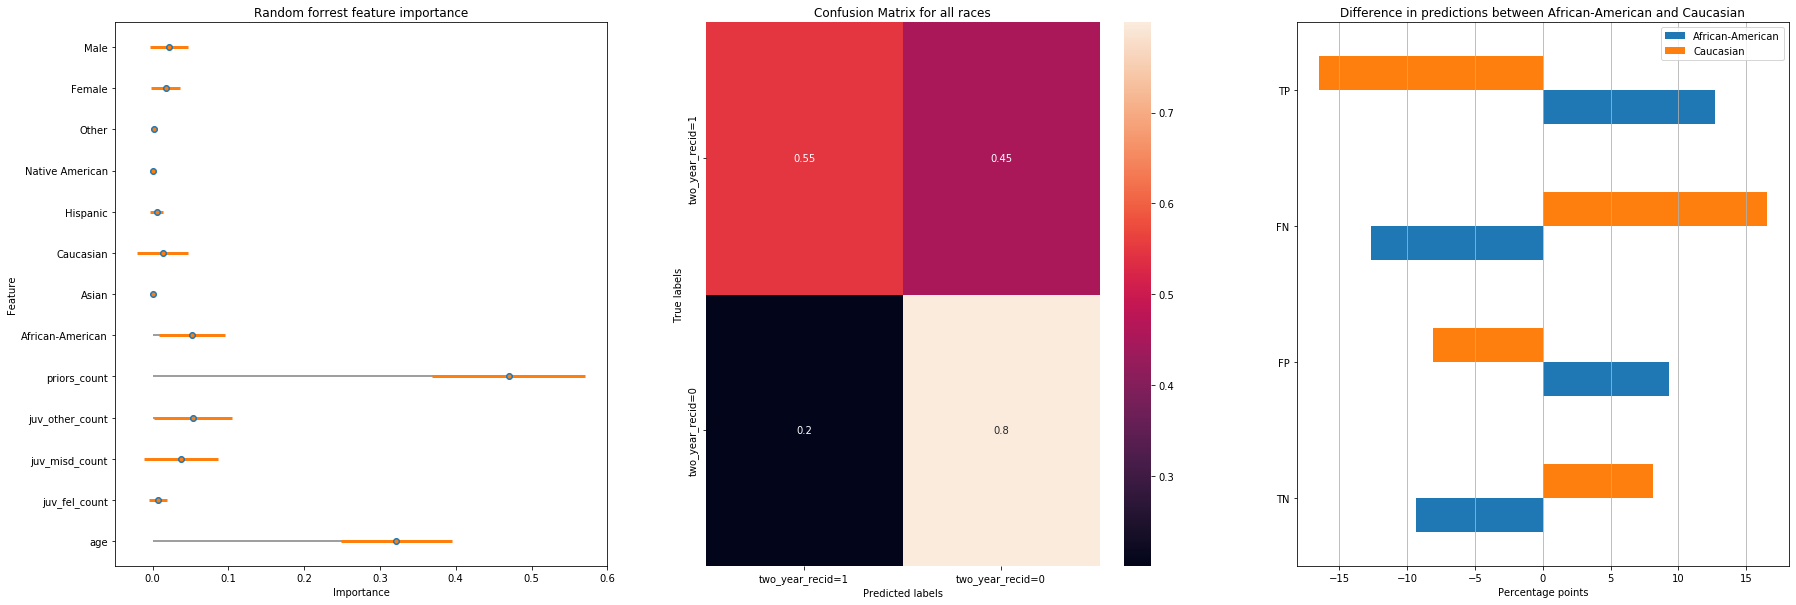

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax= plt.subplots(1,3,figsize=(30,10))
my_range=range(1,len(X_test.columns)+1)
ax[0].hlines(y=X_test.columns, xmin=0, xmax=weights, color='grey')
ax[0].plot(weights ,X_test.columns, "o")
ax[0].errorbar(weights,X_test.columns,xerr=std,elinewidth=3,fmt='.')   
ax[0].set_xlabel('Importance')
ax[0].set_ylabel('Feature')
ax[0].set_title('Random forrest feature importance')

sns.heatmap(CM, annot=True, fmt='.2g', ax=ax[1]);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# over all confusion matrix
ax[1].set_xlabel('Predicted labels');
ax[1].set_ylabel('True labels'); 
ax[1].set_title('Confusion Matrix for all races'); 
ax[1].xaxis.set_ticklabels(['two_year_recid=0', 'two_year_recid=1']); 
ax[1].yaxis.set_ticklabels(['two_year_recid=0', 'two_year_recid=1']);
ax[1].set_ylim(0, 2)
ax[1].set_xlim(2, 0)

# difference in CM 
df_race_dif.plot.barh(ax=ax[2])
ax[2].set_xlabel('Percentage points')
ax[2].set_title('Difference in predictions between African-American and Caucasian')
ax[2].xaxis.grid()


> *Visualization 2.* Classification results. This visualization will show the results of your classification model and how they are biased. This is just a different way of visualizing the results from Week 7, Exercise 2. Please, use the model you have trained/tested in Week 6 by using only the columns selected in Week 6, Exercise 3.1 and by preprocessing as in Exercise 3.2. We will make a plot containing three subplots:
> 
>   1. The first subplot shows the feature importances from the model.
>      * **If you used a Decision Tree**, use [`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to get the values and plot them as a [horizontal lollipop plot](https://python-graph-gallery.com/182-vertical-lollipop-plot).
>      * **If you used a Random Forest** you can also have the standard deviation for each feature importance by following [these steps](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html). Plot the feature importances and standard deviations by using [`plt.errorbar()`](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.errorbar.html).
>   2. The second subplot shows the confusion matrix for the entire model (as in Week 7 Ex. 2). 
>      * **N.B.** Please, use the `confusion_matrix()` function from `sklearn.metrics` and **make sure you add the parameter** `normalize="true"` which normalizes the rows of the confusion matrix and will help the comparison in the third subplot.
>      * **Hint.** [Here](https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels) and hint on how to plot it.
>   3. The third subplot shows the difference between the values of the confusion matrices of the two populations we are interested in, i.e. African-Americans and Caucasian, and the confusion matrix of your model:
> $$D_{aa} = CM_{aa} - CM_{tot};$$
> $$D_{ca} = CM_{ca} - CM_{tot};$$
> where $CM_{aa}$, $CM_{ca}$, and $CM_{tot}$ are the confusion matrices for African-Americans, Caucasians, and the total one from the model respectively. **N.B.** You do not have to retrain the model to get $CM_{aa}$ and $CM_{ca}$.
>      * Display the values for the difference in TP, TN, FP, and FN in an [horizontal bar plot](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html), where you have the difference on the x-axis, and the TP, TN, FP and FN labels on the y-axis. You can transform the difference in percentage if you wish.
>   4. Finally, customize the plot as you like: choose colors, add labels, titles, legends, captions etc. [Here](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/W8_Viz2_custom.png) and [here](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/W8_Viz2_lollipop.png) you can have a look at how I made them, but it is just for inspiration do not make it exactly the same...make it yours! make it better! 😊

In [16]:
y_prob_af=model.predict_proba(data_af)
y_prob_cau=model.predict_proba(data_cau)

def TPR_func(y,yhat):
  TP=0
  FN=0
  FP=0
  TN=0
  for i in range (len(y)):
    if y[i]==1 and yhat[i]==1:
      TP+=1
    if y[i]==0 and yhat[i]==1:
      FP+=1
    if y[i]==0 and yhat[i]==0:
      TN+=1
    if y[i]==1 and yhat[i]==0:
      FN+=1

  TPR=TP/(TP+FN)
  FPR=FP/(FP+TN)
  return TPR, FPR

def thresh(y_prob,th,N):
  y_hat=np.zeros(N)
  for i in range(N):
    if y_prob[i][1]>th:
      y_hat[i]=1
  return y_hat

def roc_curve(y, y_probs, ths):
    N=len(y)
    roc = np.array([])
    for th in ths:
      y_hat = thresh(y_probs,th,N)
      TPR, FPR = TPR_func(y, y_hat)
      roc = np.append(roc, [th, FPR, TPR])
    return roc.reshape(-1, 3)
ths=np.linspace(0,1,50)
af_roc=roc_curve(target_af.values,y_prob_af,ths)
cau_roc=roc_curve(target_cau.values,y_prob_cau,ths)



(-0.1, 1.1)

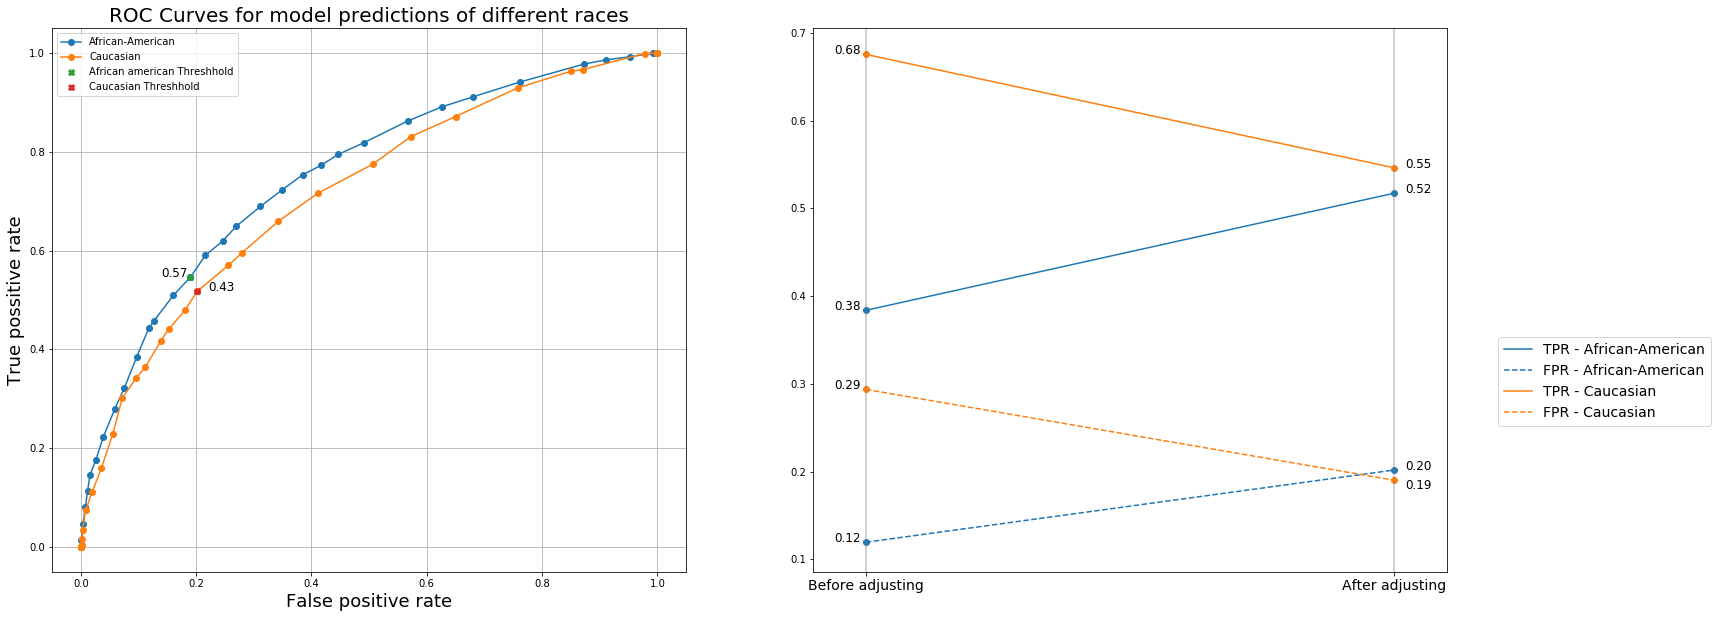

In [17]:
# plotting the roc and before and after values of the FPR and TPR
import matplotlib.pyplot as plt
af=28
cau=21
fig,ax=plt.subplots(1,2,figsize=(25,10))
ax[0].plot(af_roc[:,1],af_roc[:,2],'-o',label="African-American")
ax[0].plot(cau_roc[:,1],cau_roc[:,2],'-o',label="Caucasian")
ax[0].plot(af_roc[af,1],af_roc[af,2],'X',label="African american Threshhold")
ax[0].plot(cau_roc[cau][1],cau_roc[cau,2],'X',label="Caucasian Threshhold")
ax[0].text(af_roc[af][1]-0.05,af_roc[af,2],"{:.2f}".format(af_roc[af][0]),fontsize=12)
ax[0].text(cau_roc[cau][1]+0.02,cau_roc[cau,2],"{:.2f}".format(cau_roc[cau][0]),fontsize=12)
ax[0].legend()
ax[0].set_ylabel("True possitive rate",fontsize=18)
ax[0].set_xlabel("False positive rate",fontsize=18)
ax[0].set_title("ROC Curves for model predictions of different races",fontsize=20)
ax[0].grid()

#gather previous data in a list
prev=[ CM_cau[1][1],CM_cau[0][1],CM_af[1][1],CM_af[0][1] ] #TP,fp,TP,fp
post=[ cau_roc[cau][1:],af_roc[af][1:]]

ax[1].scatter([0,0],prev[0:2],color='tab:blue')
ax[1].scatter([0,0],prev[2:],color='tab:orange')
ax[1].scatter([1,1],post[0],color='tab:blue')
ax[1].scatter([1,1],post[1],color='tab:orange')
ax[1].set_xticks([0,1])
ax[1].set_xticklabels(["Before adjusting","After adjusting"],fontsize=14)
ax[1].axvline(x=0,color='grey',alpha=0.5)
ax[1].axvline(x=1,color='grey',alpha=0.5)

ax[1].plot([0,1],[prev[0],post[0][1]],'-',color="tab:blue",label="TPR - African-American")
ax[1].text(0-0.06,prev[0],"{:.2f}".format(prev[0]),fontsize=12)
ax[1].text(1+0.02,post[0][1],"{:.2f}".format(post[0][1]),fontsize=12)

ax[1].plot([0,1],[prev[1],post[0][0]],'--',color="tab:blue",label="FPR - African-American")
ax[1].text(0-0.06,prev[1],"{:.2f}".format(prev[1]),fontsize=12)
ax[1].text(1+0.02,post[0][0],"{:.2f}".format(post[0][0]),fontsize=12)

ax[1].plot([0,1],[prev[2],post[1][1]],'-',color="tab:orange",label="TPR - Caucasian")
ax[1].text(0-0.06,prev[2],"{:.2f}".format(prev[2]),fontsize=12)
ax[1].text(1+0.02,post[1][1],"{:.2f}".format(post[1][1]),fontsize=12)

ax[1].plot([0,1],[prev[3],post[1][0]],'--',color="tab:orange",label="FPR - Caucasian")
ax[1].text(0-0.06,prev[3],"{:.2f}".format(prev[3]),fontsize=12)
ax[1].text(1+0.02,post[1][0]-0.01,"{:.2f}".format(post[1][0]),fontsize=12)
ax[1].legend(loc='center left', bbox_to_anchor=(1.07, 0.35), prop={'size': 14})
ax[1].set_xlim(-0.1,1.1)


> *Visualization 3.* Debiasing results. The plot you are going to make shows the results from the debiasing method. Here, you will use the *Equal Odds* method and the results from Week 7, Ex. 3.3. The plot consists of two subplots:
>   1. The first subplot shows the AUC-ROC curve and highlights the threshold found for the model. It is the same visualization of Week 7, Ex. 3.3 but by using matplotlib, seaborn, etc. instead of Bokeh. In my version of the plot below, two things are missing (I want you to chose the points on the curve 😇) so **make sure to add them**:
>      * Mark the points you chose on the curves, you can for instance highlight them with a different color or symbol, or you can use a [circle](https://stackoverflow.com/questions/9215658/plot-a-circle-with-pyplot) or point at them with [arrows](https://stackoverflow.com/questions/53538909/arrow-in-plot-matplotlib-pyplot)... it's up to you.
>      * Add a text on the figure that display the thresholds chosen. You can add texts on matplotlib figures `plt.figtext()`.
>   2. The second subplot shows the True-Positive and False-Positive rates for African-Americans and Caucasian before and after the debiasing method. You can do this with a bar plot of course, however I was a bit bored of bar plots and decided that we will use a [slope chart](https://towardsdatascience.com/slope-charts-why-how-11c2a0bc28be#:~:text=Slope%20charts%20are%20simple%20graphs,in%20the%20analyzed%20time%20interval.) instead. 
>      * The slope chart will have 4 lines: TPR for African-Americans, TPR for Caucasian, FPR for African-Americans, and FPR for Caucasian. Each line has two points, i.e. the value of the rate before and after debiasing. [Here](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/W8_Viz3_custom.png), you can find my version of the plot. Again, customize it as you like, make it yours! make it better! 😊
>      * **Hint** You can have a look at this [website](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#18.-Slope-Chart) for inspiration, it also include many other visualization types so check it out for your project! 

**Note** You can add anything you like (highlighting areas, adding text etc.) to the visualizations to make them more explanatory! 

Now that you have the visualizations, move them in the structure of the article below and write the article. You should include your code, but if you want to hide the input cells to make your notebook look like an article you can do it by installing an [nbextension](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html)!

# ADD YOUR TITLE HERE

**Introduction.** Write your introduction here. Think about the audience. This is an article for the general public, so you should try to make it engaging, relatable, not too technical etc.

In [ ]:
#First viz here

**Results from exploratory data analysis.** Write this section here. The aim is to show that the data is biased, which might have an impact on the model. Relate this part to the first visualization.

In [ ]:
#Second viz here

**Results from the classification task.** Write this section here. The aim is to show that the model is biased as it is learning from biased data. Relate this part to the second visualization.

In [ ]:
#third viz here

**Results from debiasing method.** Write this section here. The aim is to show that there are methods that can help to enhance fairness in cases as this one. Relate this part to the third visualization.

**Limitations and conclusions.** Write this part here. These are your main take aways, the end of your story, where you should also highlight possible implications/limitations of what you presented.

**References.** Any article need good sources! Whenever you make a statement, refer to data sources, previous studies, methods, etc. add a reference. 

1. reference 1
2. reference 2
3. reference 3
4. etc.

You made it! This was the last lecture for this class! 

Before you go, please:
1. <mark> take a minute of your time (it is really one minute) to fill this [form](https://forms.gle/4efUQXZbjHdCaSsP8). </mark>
2. <mark> help us understand what were the pros/cons of this class by filling the second [Questionnaire](https://forms.gle/25YyJZJuBJgzXGUe8) of the course!

Thank you so much! 